# Data Scientist Take-home Challenge


This document contains list of the tasks we would like you to complete in order to evaluate fully your technical abilities. However, if by some reason you cannot get all results in full, don’t worry. The purpose of this exercise is not to get exact numbers, but to understand how you would approach similar assignments, what would be your way of thinking and how you would advise your Client at the end.


You are to work in three separate tasks. Each requires some data handling, modelling and visualizations. We would like to get following outputs from your side:

- All the pseudo-code / code from your software of preference. Please don’t forget to include notes and comments within.
- Numerical outputs of the final models and statistical calculations (if applicable for the specific task)
- Any visualizations of the data you consider useful to support your work (interactive charts would be considered as an advantage)


## Task 1 - Basic Data Handling and Presentation

You are provided with a small subset of data in `data_task1.csv` on in-store purchases by a leading chain of supermarkets. You are required to provide your input on the following questions:

- First, please identify and visualize which store has the highest turnover within the available time period.

- Second, please identify and present in sensible and convenient manner which combination of 3 items is the most frequently appearing in a single transaction (a transaction is indicated by bon_id_int).

- Third, please compute whether buying item with d_global_item_id = 115677 makes it more probable to also buy item 84872, please write your arguments, as well.

In [1]:
### import libs
import pandas as pd
from numpy import load
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from tensorflow.math import confusion_matrix
from datetime import datetime

### set project basepath

In [3]:
basepath = r"C:\Users\pascs\OneDrive\Desktop\Coding_Challenge"

### read csvs

In [20]:
df_task1 = pd.read_csv(os.path.join(basepath, "Medium", "Data", "data_task1.csv"), sep=",")
df_task1

,d_date_id,d_time_id,d_store_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,...,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
0,20140901,15,5,1,1,8320,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,0.505051
1,20140901,15,9,1,1,1,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,1.707071
2,20140901,15,9,1,1,1113,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,2.727270
3,20140901,15,9,1,1,3336,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,3.535354
4,20140901,15,9,1,1,11707,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,0.959596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20140907,42,2,1,1,59833,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,0.555556
99996,20140907,42,2,1,1,59838,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,0.898990
99997,20140907,42,2,1,1,77672,1,1,3,0,...,2,0,0.0,0.0,0.0,0,0,0,0,9.393940
99998,20140907,42,2,1,1,78760,1,1,3,0,...,1,0,0.0,0.0,0.0,0,0,0,0,1.202020


### First, please identify and visualize which store has the highest turnover within the available time period.

In [6]:
df_grouped_store = df_task1.groupby('d_store_id').sum()
df_grouped_store

,d_date_id,d_time_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,bon_id_int,...,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
d_store_id,,,,,,,,,,,,,,,,,,,,,
1,827952299750,1391057,41254,41108,2374714752,225715,41108,123324,0,23266665484,...,55735,34,0.0,0.000000,0.000000,0,0,0,0,99938.193757
2,512928413453,849323,26738,25467,1299967612,446414,25467,76401,0,16442296245,...,35386,90,0.0,0.000000,0.000000,0,0,0,0,62543.637005
3,63826524242,100779,3367,3169,142556110,126241,3169,9507,0,1346640219,...,3604,8,4.0,7.238385,0.630302,0,0,0,0,6289.416170
4,35327144938,54913,2069,1754,68276957,186380,1754,5262,0,775263757,...,2334,17,3.0,10.696969,0.000000,0,0,0,0,3624.714043
5,35991794959,57290,1787,1787,75445623,1787,1787,5361,0,808930226,...,1908,0,0.0,0.000000,0.000000,0,0,0,0,3359.143379
7,58529466819,93661,3029,2906,117803918,64454,2906,8718,0,1698997693,...,3382,3,3.0,10.696969,0.000000,0,0,0,0,5756.054586
8,27089516059,43346,1345,1345,37205898,1345,1345,4035,0,1028766906,...,1729,0,0.0,0.000000,0.000000,0,0,0,0,2732.531295
9,47331123671,76085,2670,2350,114400152,145981,2350,7050,0,1821213976,...,2716,14,1.5,1.782829,0.136363,0,0,0,0,4439.215999
10,88559554380,138748,5261,4397,207514522,373757,4397,13191,0,3488242745,...,5020,26,8.8,26.808081,1.537373,0,0,0,0,8349.036449


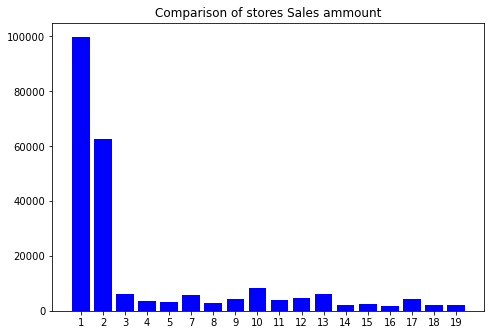

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Comparison of stores Sales ammount")
ax.bar(tick_label =df_grouped_store.index, height = df_grouped_store["sales_amount"], x= np.arange(len(df_grouped_store.index.tolist())) , color = "blue", label= "sales_amount")
plt.show()

assumption: turnover = sales_amount -> The store number 1 has the highest turnover.

### Second, please identify and present in sensible and convenient manner which combination of 3 items is the most frequently appearing in a single transaction (a transaction is indicated by bon_id_int).

In [24]:
df_bon_id_int_d_item_id = pd.DataFrame()

lst_unique_bon_id = list(set(df_task1["bon_id_int"].tolist()))
lst_unique_item_id = list(set(df_task1["d_global_item_id"].tolist()))

df_unique_grid = pd.DataFrame(np.zeros((len(lst_unique_item_id), len(lst_unique_bon_id))), index = lst_unique_item_id, columns =lst_unique_bon_id )

for d_item_id,bon_id_int in zip(df_task1["d_global_item_id"],df_task1["bon_id_int"]):
    for bon_id_int_unique in df_unique_grid.columns:
        for d_item_id_unique in df_unique_grid.index:
            if d_item_id == d_item_id_unique and bon_id_int == bon_id_int_unique:
                df_unique_grid[bon_id_int_unique].loc[d_item_id_unique] =+1

print(df_unique_grid)

KeyboardInterrupt: 

The code above creates a grid of zeros with the col_names = bon_id_int, and index = d_global_item_id.
As a second step it updates each value in the grid by 1 if there was a match between bon_id_int and d_global_item_id.
It was discovered that it takes quite a while to execute.

## Third, please compute whether buying item with d_global_item_id = 115677 makes it more probable to also buy item 84872, please write your arguments, as well.

In [37]:
count = 0
df_d_global_item_id1 = df_task1.where(df_task1["d_global_item_id"]== 115677).dropna()
df_d_global_item_id2 = df_task1.where(df_task1["d_global_item_id"]== 84872).dropna()
df_d_global_item_id1

for bon_id_int1 in df_d_global_item_id1["bon_id_int"]:
    for bon_id_int2 in df_d_global_item_id2["bon_id_int"]:
        if bon_id_int1 == bon_id_int2:
            count =+1
print("Number of times d_global_item_id = 84872 and 115677 per transaction: ",count)
print("Number of times d_global_item_id =  115677: ",df_d_global_item_id1.size)
print("Number of times d_global_item_id =  84872: ",df_d_global_item_id2.size)

Number of times d_global_item_id = 84872 and 115677 per transaction:  1
Number of times d_global_item_id =  115677:  1110
Number of times d_global_item_id =  84872:  1380


As one can see that there were 1110 times where d_global_item_id was = 115677 and were 1380 times where d_global_item_id was = 84872.
And there was only 1 time where both of them together where bought in the same transaction. So the probability seem to be very low.

## Task 2 - Data Wrangling

You are provided with extracts from two datasets in `data_task2_extract_1.csv` and `data_task2_extract_2.csv`, containing company information. 

The first dataset has standardized publically available information obtained via web scrapping, the second dataset contains confidential internal company information. 

In full, the datasets contain tens of thousands of observations so manual processing is not feasible. The task at hand is to match the data items between the two datasets as best as possible. The primary matching criteria is Address (identified by fields **Address Name**, **City** and **PostCode**). However, address fields are often inputted by humans, thus conventions vary widely. 

Please prepare an automated approach for canonicalization. Your code should handle discrepancies such as representing *Strasse* in full or shortened (*Str.*). The algorithm need not handle for all possible discrepancies, as this is hard to implement without the full data, description of an iterative procedure is sufficient.

**Bonus** - One company might appear with different addresses. Imagine the company building / offices are at an intersection and the company records contain registration on each of the two intersecting streets, i.e. addresses are different. Please formulate an approach to handle for such cases. Sample implementation will yield more points.

In [39]:
df_task2_extract1 = pd.read_csv(os.path.join(basepath, "Medium", "Data", "data_task2_extract_1.csv"), sep=",")
df_task2_extract2 = pd.read_csv(os.path.join(basepath, "Medium", "Data", "data_task2_extract_2.csv"), sep=",")
print(df_task2_extract1.loc[:10])
print(df_task2_extract2.loc[:10])

                      Company.Name                 Address             City  \
0                     Carsten Helm             Ulmenstr. 8           Wismar   
1   Zirpel & Pautzsch Ingenieur Pa        Paditzer Str. 33        Altenburg   
2                  Eberhard Zessin       Steingartenweg 12       Heidelberg   
3                     Gerold Fuchs              Mühlweg 12        Dietingen   
4                  Rudi Biedritzky      Zaisentalstr. 70/1       Reutlingen   
5                   Wolfgang Jäger           Wiesenstr. 11           Rodgau   
6                    Mario Tsiknas              Am Delf 31  Bad Zwischenahn   
7   Matthias Essers GmbH Elektrote   Leopold-Hoesch-Str. 4    Geilenkirchen   
8                    Andre Hanisch       Im Kressgraben 18   Untereisesheim   
9                      Paul Strigl  Thomas-Schwarz-Str. 26           Dachau   
10                   Stefan Magerl           Schauerweg 27            Lorch   

   Postcode  
0     23966  
1      4600  
2     691

My understanding of this task is to match the company Names of the webscraped list to the internal list.

## Task 3 - Data  Modelling

You are provided with a small-scale survey data investigating grocery purchasing behaviour and habits of Croatians. First, please review the enclosed pdf file. This is the survey questionnaire describing all key information on how data had been gathered and each interview conducted.

The task at hand is to cluster the respondents in relatively homogenous groups. Start with all informative variables in the dataset. If you deem it necessary, you may create any number of additional derivative variables or include of publically available data. In case, your classification is based on specific subset of variables, please clearly describe why and how you have arrived at precisely this subset.

Write up: as clearly as possible please describe the procedure you have applied, the results and the insights you would draw from the segmentation. Parameter selection must be justified. The write-up should not exceed one page, 1.5-spaced, Arial, 12pts, standard margins.